In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('whitegrid')
from tqdm import tqdm_notebook

In [2]:
class Network:
    """
    A class to hold the queueing network object
    """

    def __init__(self, n1, mu1, r11, L1, B1):
        """
        Initialises the Network object
        """
        self.n1 = n1
        self.mu1 = mu1
        self.r11 = r11
        self.L1 = L1
        self.B1 = B1
        self.State_Space = [(i) for i in range(self.n1+2)] + [-1]
        self.write_transition_matrix()
        self.discretise_transition_matrix()

    def find_transition_rates(self, state1, state2):
        """
        Finds the transition rates for given state transition
        """
        if state1 == -1:
            return 0
        if state2 == -1:
            if state1 == self.n1 + 1:
                return self.r11*self.mu1
            else:
                return 0
        else:
            delta = (state2-state1)
            if delta == 1:
                if 0<state1<self.n1+1:
                    return self.L1*self.B1/(state1)
                else:
                    return self.L1
                return 0
            if delta == -1:
                return (1-self.r11)*self.mu1
        return 0

    def write_transition_matrix(self):
        """
        Writes the transition matrix for the markov chain
        """
        self.transition_matrix = [[self.find_transition_rates(s1, s2) for s2 in self.State_Space] for s1 in self.State_Space]
        for i in range(len(self.transition_matrix)):
            a = sum(self.transition_matrix[i])
            self.transition_matrix[i][i] = -a
            self.transition_matrix = np.array(self.transition_matrix)

    def discretise_transition_matrix(self):
        """
        Disctetises the transition matrix
        """
        self.time_step = 1 / max([abs(self.transition_matrix[i][i]) for i in range(len(self.transition_matrix))])
        self.discrete_transition_matrix = self.transition_matrix*self.time_step + np.identity(len(self.transition_matrix))

    def find_mean_time_to_absorbtion(self):
        """
        Finds the mean time to absorbtion
        """
        T = self.discrete_transition_matrix[:-1, :-1]
        S = np.linalg.inv(np.identity(len(T)) - T)
        steps2absorb = [sum([S[i,j] for j in range(len(S))]) for i in range(len(S))]
        time2absorb = [s*self.time_step for s in steps2absorb]
        self.mean_steps_to_absorbtion = {str(self.State_Space[i]): steps2absorb[i] for i in range(len(steps2absorb))}
        self.mean_time_to_absorbtion = {str(self.State_Space[i]): float(time2absorb[i]) for i in range(len(time2absorb))}

In [3]:
def time_to_deadlock(Lambda, mu, n, r11, beta):
    N = Network(n, mu, r11, Lambda, beta)
    N.find_mean_time_to_absorbtion()
    return N.mean_time_to_absorbtion['0']

In [112]:
b = [i for i in np.linspace(0.1, 1.0, 37)]
b

[0.10000000000000001,
 0.125,
 0.15000000000000002,
 0.17500000000000002,
 0.20000000000000001,
 0.22500000000000001,
 0.25,
 0.27500000000000002,
 0.30000000000000004,
 0.32500000000000001,
 0.34999999999999998,
 0.375,
 0.40000000000000002,
 0.42500000000000004,
 0.45000000000000007,
 0.47499999999999998,
 0.5,
 0.52500000000000002,
 0.55000000000000004,
 0.57500000000000007,
 0.59999999999999998,
 0.625,
 0.65000000000000002,
 0.67500000000000004,
 0.70000000000000007,
 0.72499999999999998,
 0.75,
 0.77500000000000002,
 0.80000000000000004,
 0.82500000000000007,
 0.84999999999999998,
 0.875,
 0.90000000000000002,
 0.92500000000000004,
 0.95000000000000007,
 0.97499999999999998,
 1.0]

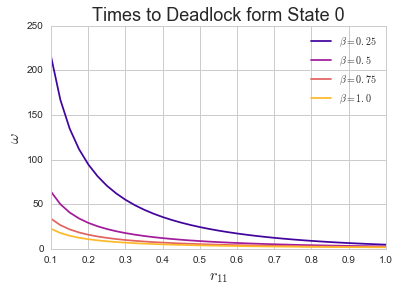

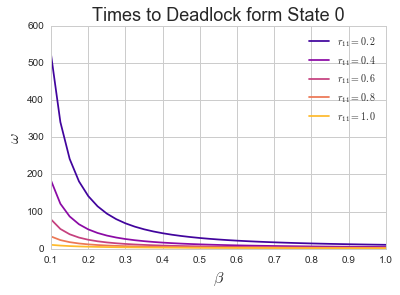

In [121]:
L = 3.0
m = 3.0
n = 2
r11 = 0.6
betas_bottom = [i for i in np.linspace(0.1, 1.0, 37)]
betas_leg = [0.25, 0.5, 0.75, 1.0]
params_bottom = [i for i in np.linspace(0.1, 1.0, 37)]
params_leg = [0.2, 0.4, 0.6, 0.8, 1.0]
times = [[time_to_deadlock(L, m, n, r11, beta) for beta in betas_bottom] for r11 in params_leg]
times_inv = [[time_to_deadlock(L, m, n, r11, beta) for r11 in params_bottom] for beta in betas_leg]

fig = plt.figure()
ax = fig.add_subplot(111)
colors = [cm.plasma(x) for x in np.linspace(0.1, 0.85, len(times_inv))]
for i in range(len(times_inv)):
    plt.plot(params_bottom, times_inv[i], c=colors[i], label=r'$\beta = ' + str(betas_leg[i]) + '$')
plt.legend(loc=0, fontsize=10)
plt.xlabel(r'$r_{11}$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig('varyr11_bybeta.pdf')


fig = plt.figure()
ax = fig.add_subplot(111)
colors = [cm.plasma(x) for x in np.linspace(0.1, 0.85, len(times))]
for i in range(len(times)):
    plt.plot(betas_bottom, times[i], c=colors[i], label=r'$r_{11} = ' + str(params_leg[i]) + '$')
plt.legend(loc=0, fontsize=10)
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig('varybeta_byr11.pdf')

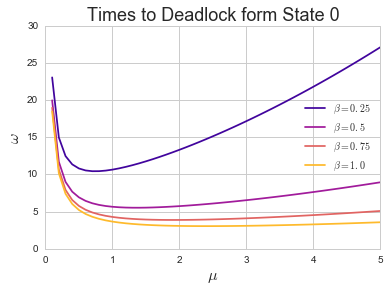

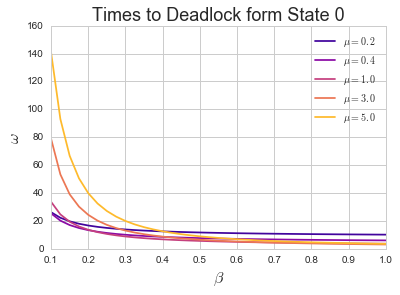

In [124]:
L = 3.0
m = 3.0
n = 2
r11 = 0.6
betas_bottom = [i for i in np.linspace(0.1, 1.0, 37)]
betas_leg = [0.25, 0.5, 0.75, 1.0]
params_bottom = [i for i in np.linspace(0.1, 5, 50)]
params_leg = [0.2, 0.4, 1.0, 3.0, 5.0]
times = [[time_to_deadlock(L, m, n, r11, beta) for beta in betas_bottom] for m in params_leg]
times_inv = [[time_to_deadlock(L, m, n, r11, beta) for m in params_bottom] for beta in betas_leg]

fig = plt.figure()
ax = fig.add_subplot(111)
colors = [cm.plasma(x) for x in np.linspace(0.1, 0.85, len(times_inv))]
for i in range(len(times_inv)):
    plt.plot(params_bottom, times_inv[i], c=colors[i], label=r'$\beta = ' + str(betas_leg[i]) + '$')
plt.legend(loc=0, fontsize=10)
plt.xlabel(r'$\mu$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig('varymu_bybeta.pdf')


fig = plt.figure()
ax = fig.add_subplot(111)
colors = [cm.plasma(x) for x in np.linspace(0.1, 0.85, len(times))]
for i in range(len(times)):
    plt.plot(betas_bottom, times[i], c=colors[i], label=r'$\mu = ' + str(params_leg[i]) + '$')
plt.legend(loc=0, fontsize=10)
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig('varybeta_bymu.pdf')

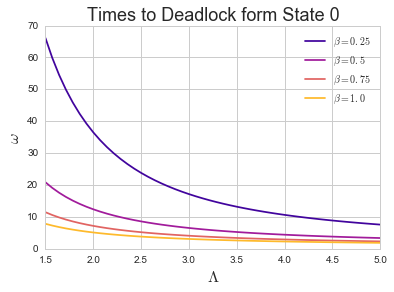

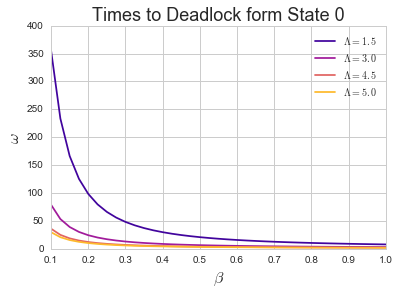

In [127]:
L = 3.0
m = 3.0
n = 2
r11 = 0.6
betas_bottom = [i for i in np.linspace(0.1, 1.0, 37)]
betas_leg = [0.25, 0.5, 0.75, 1.0]
params_bottom = [i for i in np.linspace(1.5, 5, 50)]
params_leg = [1.5, 3.0, 4.5, 5.0]
times = [[time_to_deadlock(L, m, n, r11, beta) for beta in betas_bottom] for L in params_leg]
times_inv = [[time_to_deadlock(L, m, n, r11, beta) for L in params_bottom] for beta in betas_leg]

fig = plt.figure()
ax = fig.add_subplot(111)
colors = [cm.plasma(x) for x in np.linspace(0.1, 0.85, len(times_inv))]
for i in range(len(times_inv)):
    plt.plot(params_bottom, times_inv[i], c=colors[i], label=r'$\beta = ' + str(betas_leg[i]) + '$')
plt.legend(loc=0, fontsize=10)
plt.xlabel(r'$\Lambda$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig('varyLambda_bybeta.pdf')


fig = plt.figure()
ax = fig.add_subplot(111)
colors = [cm.plasma(x) for x in np.linspace(0.1, 0.85, len(times))]
for i in range(len(times)):
    plt.plot(betas_bottom, times[i], c=colors[i], label=r'$\Lambda = ' + str(params_leg[i]) + '$')
plt.legend(loc=0, fontsize=10)
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig('varybeta_byLambda.pdf')

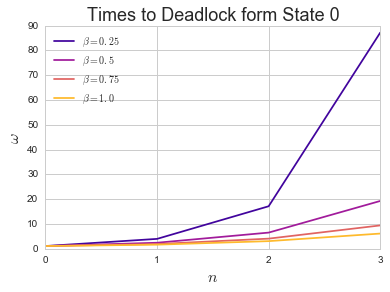

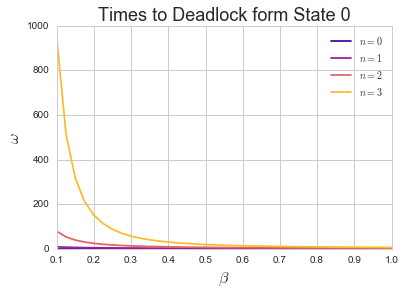

In [132]:
L = 3.0
m = 3.0
n = 2
r11 = 0.6
betas_bottom = [i for i in np.linspace(0.1, 1.0, 37)]
betas_leg = [0.25, 0.5, 0.75, 1.0]
params_bottom = [0, 1, 2, 3]
params_leg = [0, 1, 2, 3]
times = [[time_to_deadlock(L, m, n, r11, beta) for beta in betas_bottom] for n in params_leg]
times_inv = [[time_to_deadlock(L, m, n, r11, beta) for n in params_bottom] for beta in betas_leg]

fig = plt.figure()
ax = fig.add_subplot(111)
colors = [cm.plasma(x) for x in np.linspace(0.1, 0.85, len(times_inv))]
for i in range(len(times_inv)):
    plt.plot(params_bottom, times_inv[i], c=colors[i], label=r'$\beta = ' + str(betas_leg[i]) + '$')
plt.legend(loc=0, fontsize=10)
plt.xticks([0, 1, 2, 3])
plt.xlabel(r'$n$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig('varyn_bybeta.pdf')


fig = plt.figure()
ax = fig.add_subplot(111)
colors = [cm.plasma(x) for x in np.linspace(0.1, 0.85, len(times))]
for i in range(len(times)):
    plt.plot(betas_bottom, times[i], c=colors[i], label=r'$n = ' + str(params_leg[i]) + '$')
plt.legend(loc=0, fontsize=10)
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig('varybeta_byn.pdf')

In [168]:
L = 3.0
m = 3.0
n = 2
r11 = 0.6
betas = [i for i in np.linspace(0.2, 1.0, 81)]
params = [i for i in np.linspace(0.01, 1, 100)]
times = [[time_to_deadlock(L, m, n, r11, beta) for beta in betas] for m in params]

In [169]:
x = betas
y = params
X,Y = np.meshgrid(x, y)

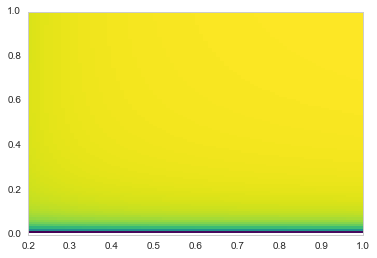

In [170]:
plt.pcolor(X, Y, times, cmap='viridis_r')

In [5]:
def loop_through(startmu, step, n1, r11, L1, beta):
    deadlock_list = [float('Inf')]
    prevmu = 0.0
    i = startmu
    go = True
    while go:
        mu1 = i
        Q = Network(n1, mu1, r11, L1, beta)
        Q.find_mean_time_to_absorbtion()
        deadlock_list.append(Q.mean_time_to_absorbtion['0'])
        if deadlock_list[-1] > deadlock_list[-2]:
            go = False
            actualmu = prevmu
        else:
            prevmu = i
            i += step
    return actualmu

In [6]:
def find_threshold_to_5dc(start, n1, r11, L1, beta):
    s1 = loop_through(start, 0.1, n1, r11, L1, beta)
    s2 = loop_through(s1, 0.01, n1, r11, L1, beta)
    s3 = loop_through(s2, 0.001, n1, r11, L1, beta)
    s4 = loop_through(s3, 0.0001, n1, r11, L1, beta)
    s5 = loop_through(s4, 0.00001, n1, r11, L1, beta)
    s6 = loop_through(s5, 0.000001, n1, r11, L1, beta)
    return s6

In [10]:
L1 = 3.0
n1 = 2
r11 = 0.6
start = 0.0000001
beta = 0.6
var_list = [1, 2, 3]
threshold_list = []
beta_list = [round(i*0.01, 2) for i in range(1, 101)]
for n1 in tqdm_notebook(var_list):
    threshold_list.append([])
    for beta in tqdm_notebook(beta_list):
        threshold_list[-1].append(find_threshold_to_5dc(start, n1, r11, L1, beta))

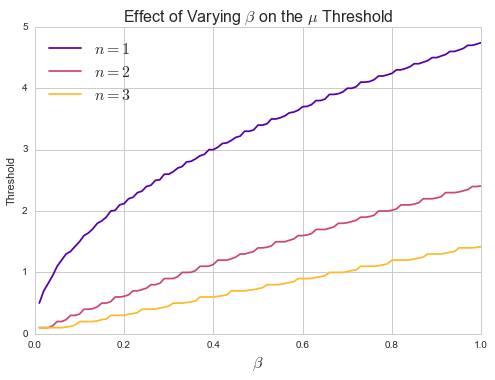

In [23]:
colours = [ cm.plasma(x) for x in np.linspace(0.15, 0.85, len(threshold_list)) ]
for i in range(len(threshold_list)):
    plt.plot(beta_list, threshold_list[i], c=colours[i], label=r'$n = ' + str(var_list[i]) + '$')
plt.title(r'Effect of Varying $\beta$ on the $\mu$ Threshold', fontsize=16)
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel('Threshold')
plt.legend(loc=0, fontsize=16)
plt.savefig('thresholdbeta_plot.pdf')

In [24]:
threshold_diffs = [[] for r in threshold_list]
for k in range(len(threshold_list)):
    threshold_diffs[k] = [threshold_list[k][i+1]-threshold_list[k][i] for i in range(len(threshold_list[k])-1)]

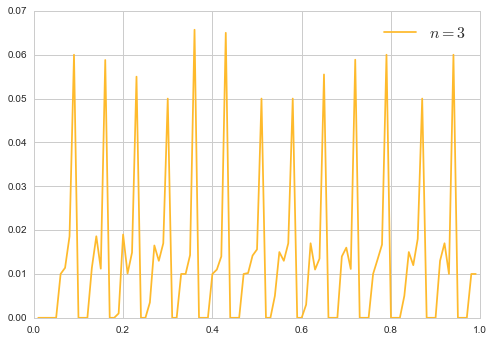

In [31]:
colours = [ cm.plasma(x) for x in np.linspace(0.15, 0.85, len(threshold_list)) ]
# for i in range(len(threshold_diffs)):
i = 2
plt.plot(beta_list[:-1], threshold_diffs[i], c=colours[i], label=r'$n = ' + str(var_list[i]) + '$')
plt.legend(loc=0, fontsize=16)
plt.show()